In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('../data/data.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
df = df.drop_duplicates(subset = ['deskripsi'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 0 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23965 non-null  object 
 1   kamar          23965 non-null  object 
 2   lb             23250 non-null  float64
 3   lt             19514 non-null  float64
 4   tipe_property  23965 non-null  object 
 5   price          23954 non-null  float64
 6   sertifikat     23965 non-null  int64  
 7   deskripsi      23964 non-null  object 
 8   lokasi         23596 non-null  object 
 9   ada_garasi     23965 non-null  float64
 10  pool           23965 non-null  int64  
 11  taman          23965 non-null  int64  
 12  electricity    23456 non-null  float64
 13  floors_total   23784 non-null  float64
 14  gym            23965 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 2.9+ MB


Benerin tipe data

In [4]:
df = df.dropna(subset = ['price','lokasi'])

In [5]:
df[['pool','taman','gym','sertifikat']] = df[['pool','taman','gym','sertifikat']].astype('bool')

In [6]:
df['ada_garasi'] = df['ada_garasi'].apply(lambda x: True if x > 0 else False)

In [7]:
df = df[df['kamar']!='>10']

In [8]:
df['kamar'] = df['kamar'].astype('float')

In [9]:
df['kamar'] = df['kamar'].astype('int')

In [10]:
df = df[df['kamar_mandi'] != '>10']

In [11]:
df['kamar_mandi'] = df['kamar_mandi'].astype('float')

In [12]:
df['kamar_mandi'] = df['kamar_mandi'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23539 entries, 0 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23539 non-null  int64  
 1   kamar          23539 non-null  int64  
 2   lb             22851 non-null  float64
 3   lt             19255 non-null  float64
 4   tipe_property  23539 non-null  object 
 5   price          23539 non-null  float64
 6   sertifikat     23539 non-null  bool   
 7   deskripsi      23539 non-null  object 
 8   lokasi         23539 non-null  object 
 9   ada_garasi     23539 non-null  bool   
 10  pool           23539 non-null  bool   
 11  taman          23539 non-null  bool   
 12  electricity    23046 non-null  float64
 13  floors_total   23363 non-null  float64
 14  gym            23539 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.1+ MB


# Nilai masuk akal
lantai max 60 (cek wiki)

kamar max 100(kos2an masih masuk akal)

kamar mandi 50(idem)


In [14]:
len(df[df['electricity']>50000])

37

In [15]:
df = df[df['floors_total']<60]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23347 entries, 1 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23347 non-null  int64  
 1   kamar          23347 non-null  int64  
 2   lb             22662 non-null  float64
 3   lt             19071 non-null  float64
 4   tipe_property  23347 non-null  object 
 5   price          23347 non-null  float64
 6   sertifikat     23347 non-null  bool   
 7   deskripsi      23347 non-null  object 
 8   lokasi         23347 non-null  object 
 9   ada_garasi     23347 non-null  bool   
 10  pool           23347 non-null  bool   
 11  taman          23347 non-null  bool   
 12  electricity    22863 non-null  float64
 13  floors_total   23347 non-null  float64
 14  gym            23347 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.1+ MB


In [16]:
df = df[df['kamar_mandi']<30]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23159 entries, 1 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23159 non-null  int64  
 1   kamar          23159 non-null  int64  
 2   lb             22482 non-null  float64
 3   lt             18890 non-null  float64
 4   tipe_property  23159 non-null  object 
 5   price          23159 non-null  float64
 6   sertifikat     23159 non-null  bool   
 7   deskripsi      23159 non-null  object 
 8   lokasi         23159 non-null  object 
 9   ada_garasi     23159 non-null  bool   
 10  pool           23159 non-null  bool   
 11  taman          23159 non-null  bool   
 12  electricity    22676 non-null  float64
 13  floors_total   23159 non-null  float64
 14  gym            23159 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.1+ MB


In [17]:
df = df[df['kamar']<60]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          23154 non-null  int64  
 1   kamar_mandi    23154 non-null  int64  
 2   kamar          23154 non-null  int64  
 3   lb             22478 non-null  float64
 4   lt             18886 non-null  float64
 5   tipe_property  23154 non-null  object 
 6   price          23154 non-null  float64
 7   sertifikat     23154 non-null  bool   
 8   deskripsi      23154 non-null  object 
 9   lokasi         23154 non-null  object 
 10  ada_garasi     23154 non-null  bool   
 11  pool           23154 non-null  bool   
 12  taman          23154 non-null  bool   
 13  electricity    22671 non-null  float64
 14  floors_total   23154 non-null  float64
 15  gym            23154 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.1+ MB


In [56]:
# check margin of error *catatan = data masih mengandung outliers
# jumlah rumah tangga di jakarta = 2659205(bps) -> kurang lebih jumlah rumah/apartemen sama
# ga include keluarga yg ngekost sama anak gatau diri yg udah nikah masih nebeng ortu
# yekali sekeluarga ngemper
from math import sqrt
sqrt((2659205-len(df))/(2659205*len(df)))*100

0.654316663084042

Cek distribusi

In [18]:
num = [i for i in df.columns if (df[i].dtypes in ['int','float']) & (i != 'index')]
cat = [i for i in df.columns if (df[i].dtypes == 'O') | (df[i].dtypes == 'bool')]

kamar_mandi


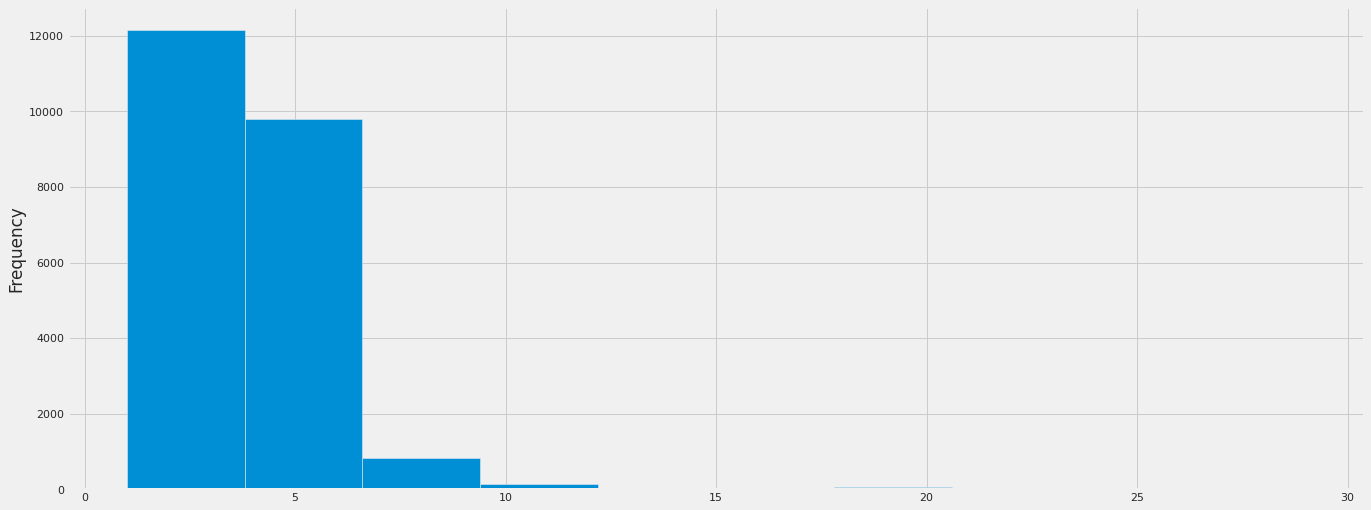

kamar


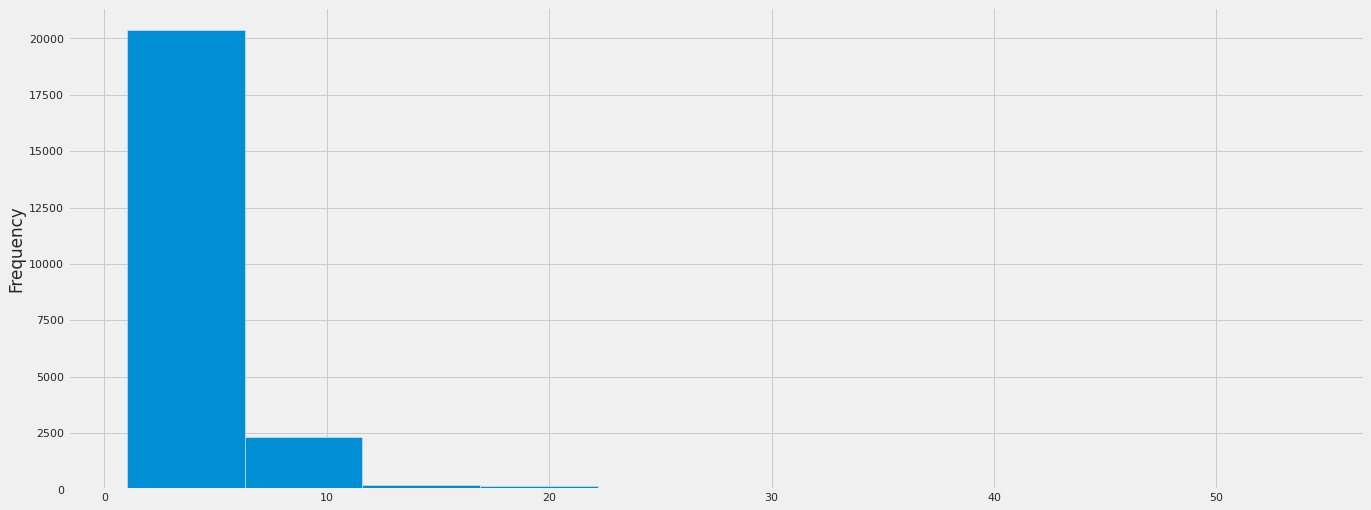

lb


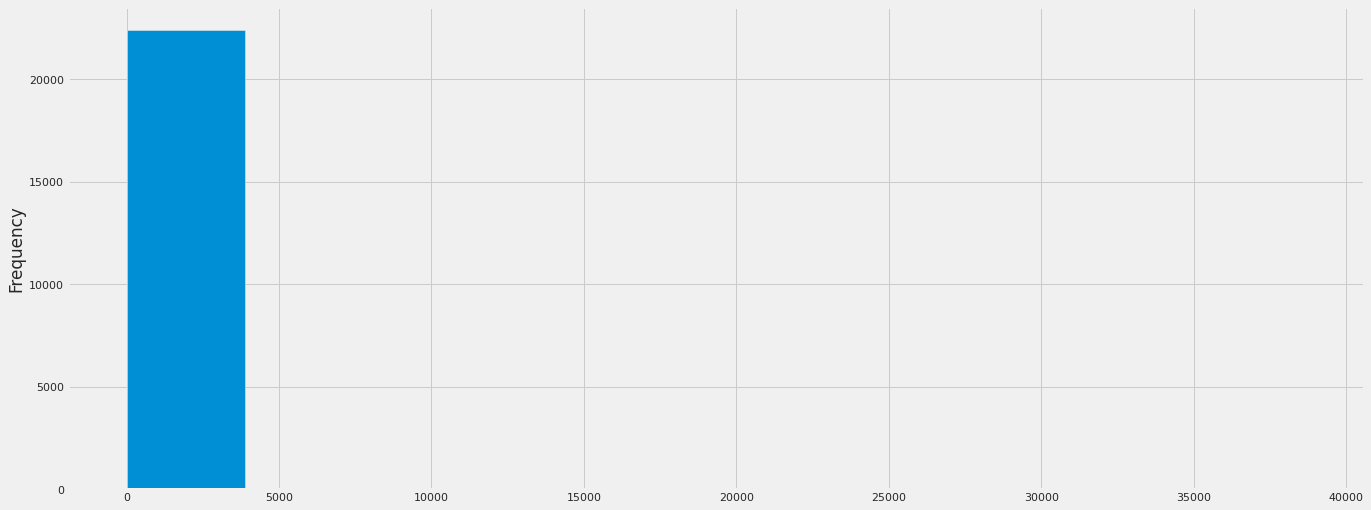

lt


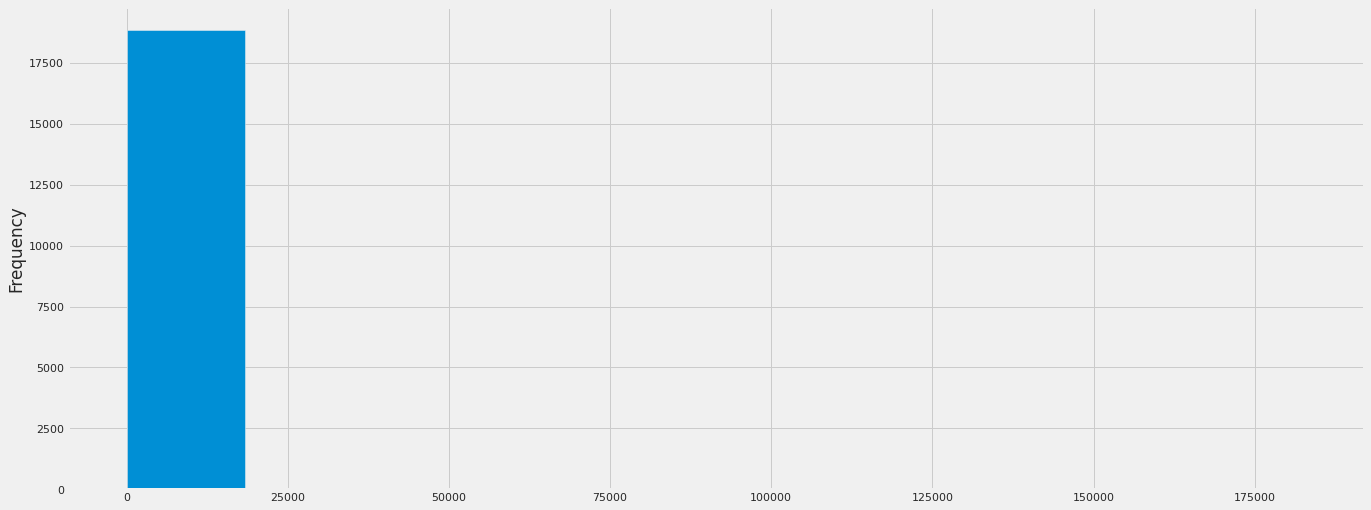

price


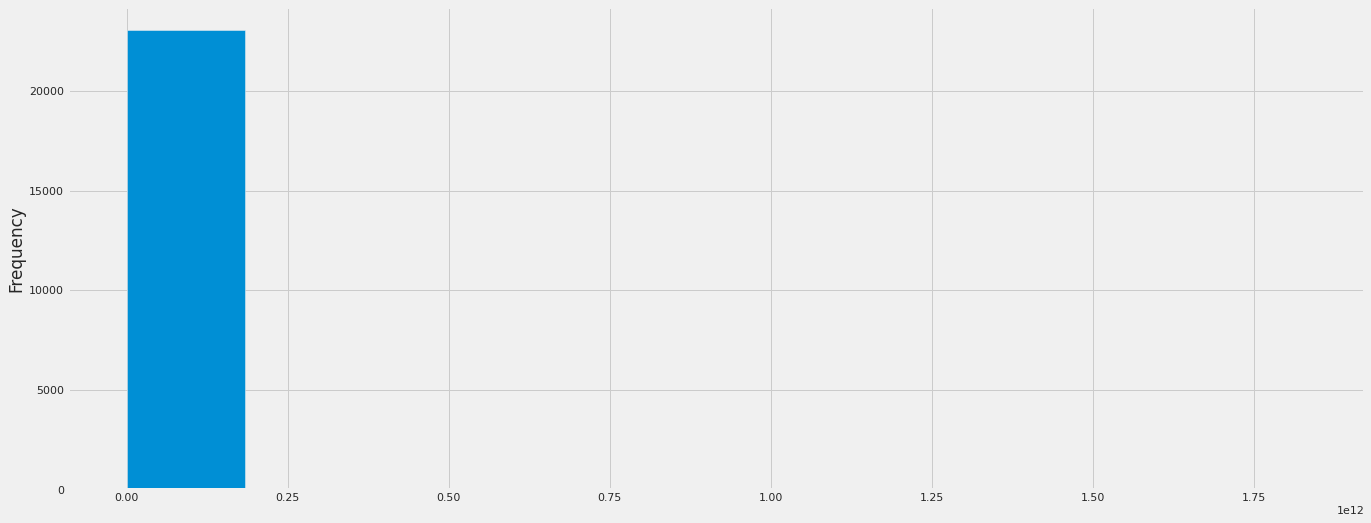

electricity


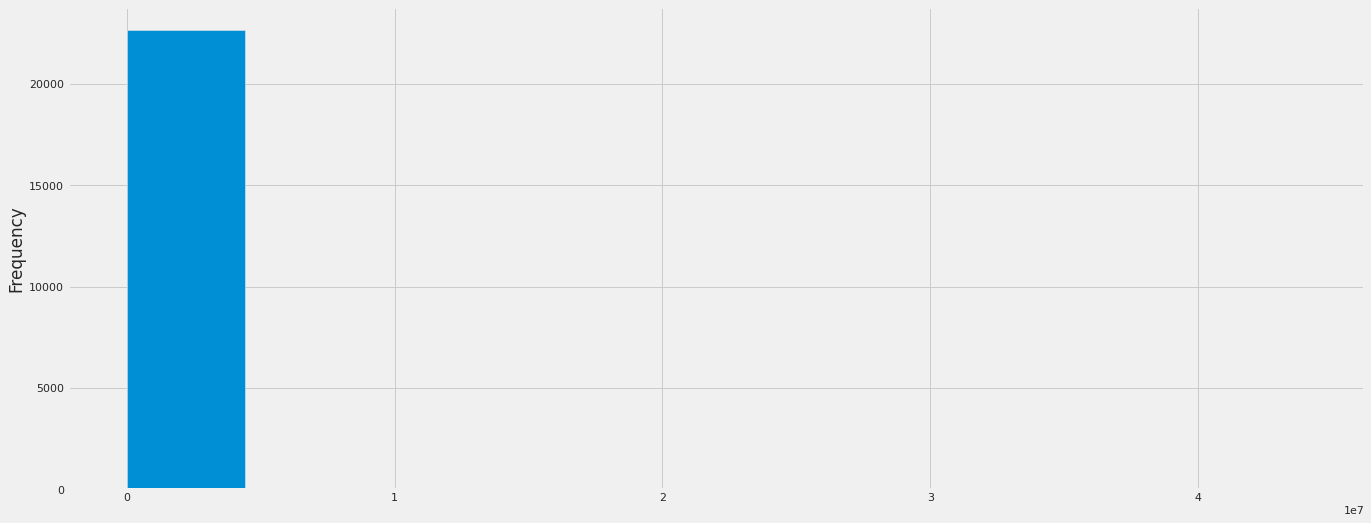

floors_total


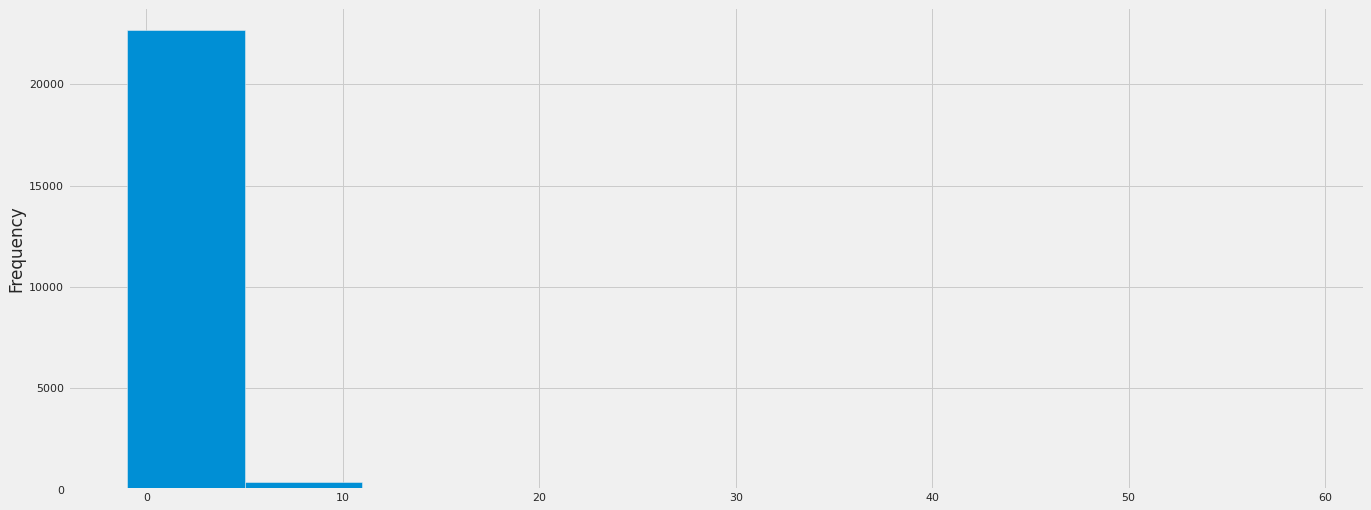

In [19]:
for i in num:
    print(i)
    df[i].plot.hist()
    plt.show()

tipe_property


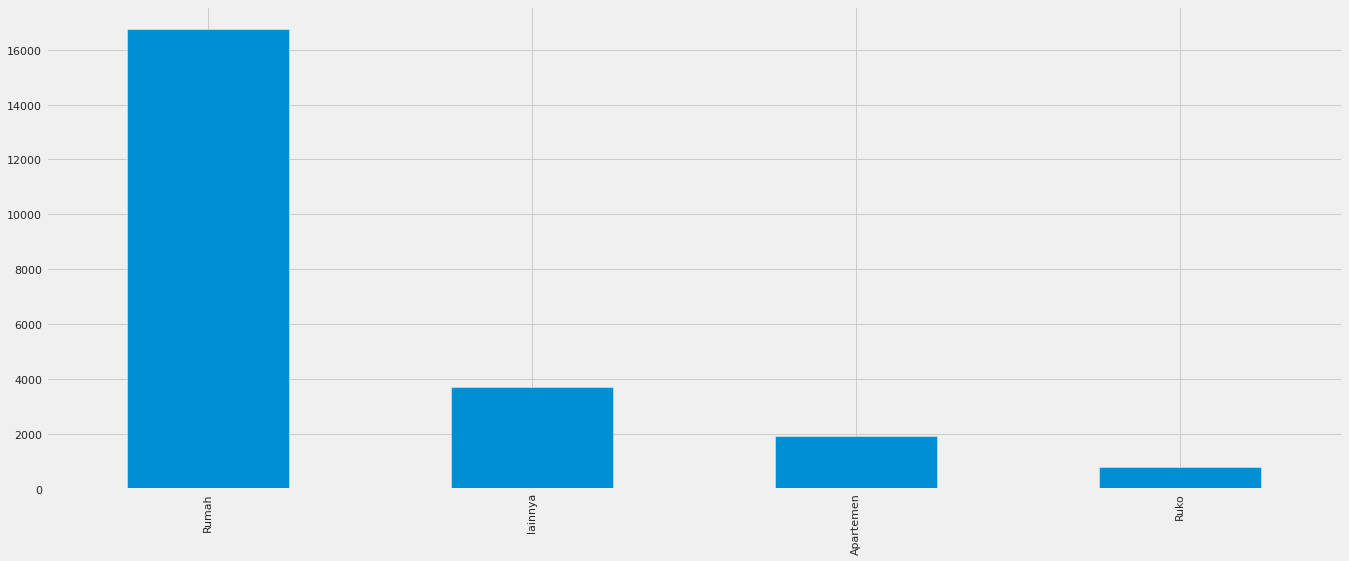

sertifikat


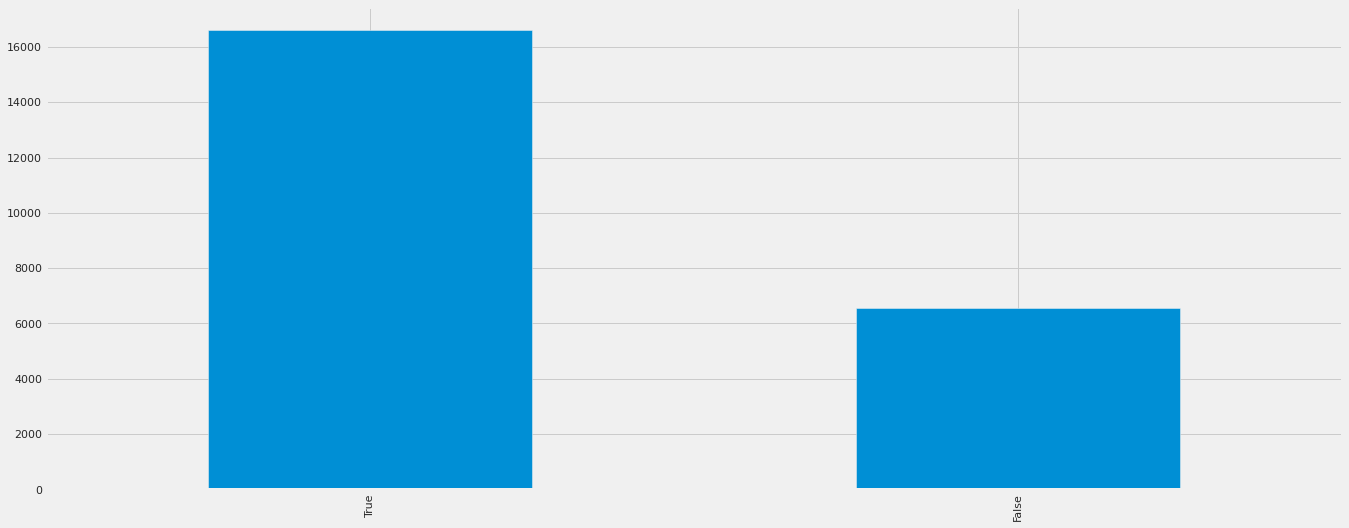

lokasi


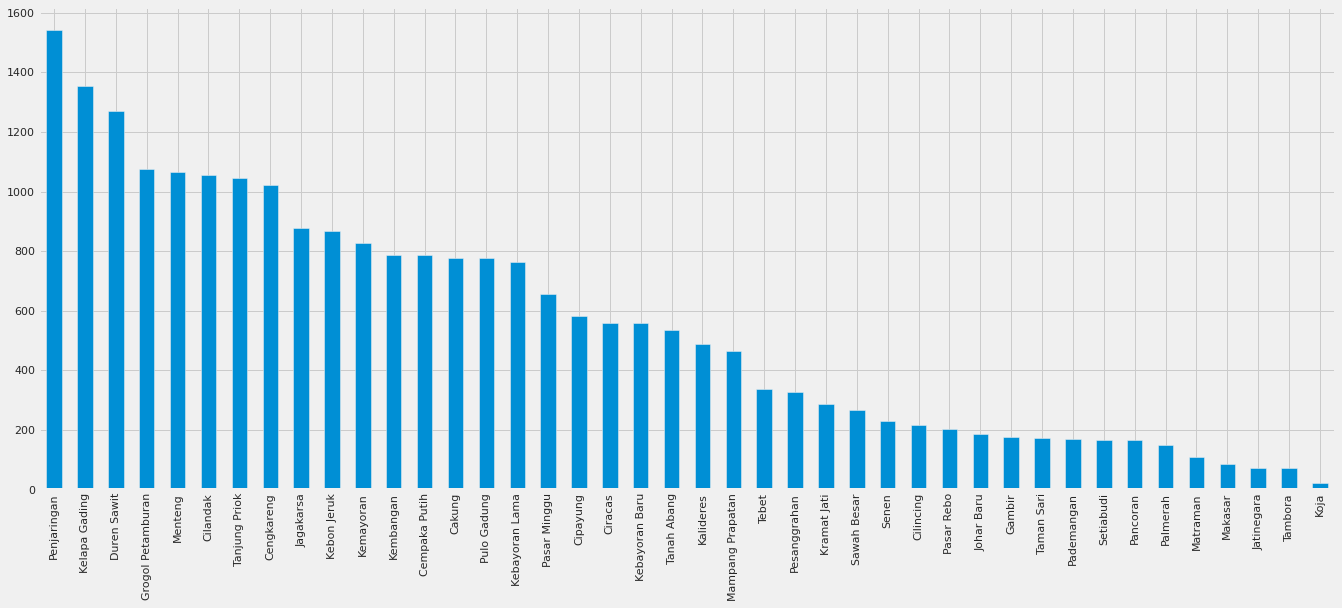

ada_garasi


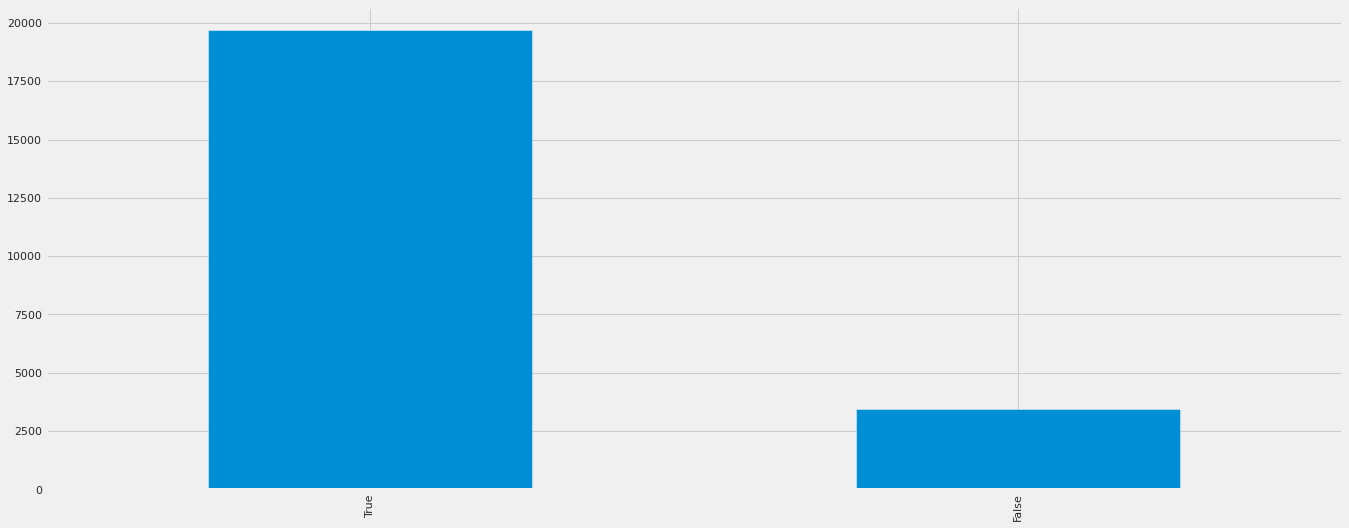

pool


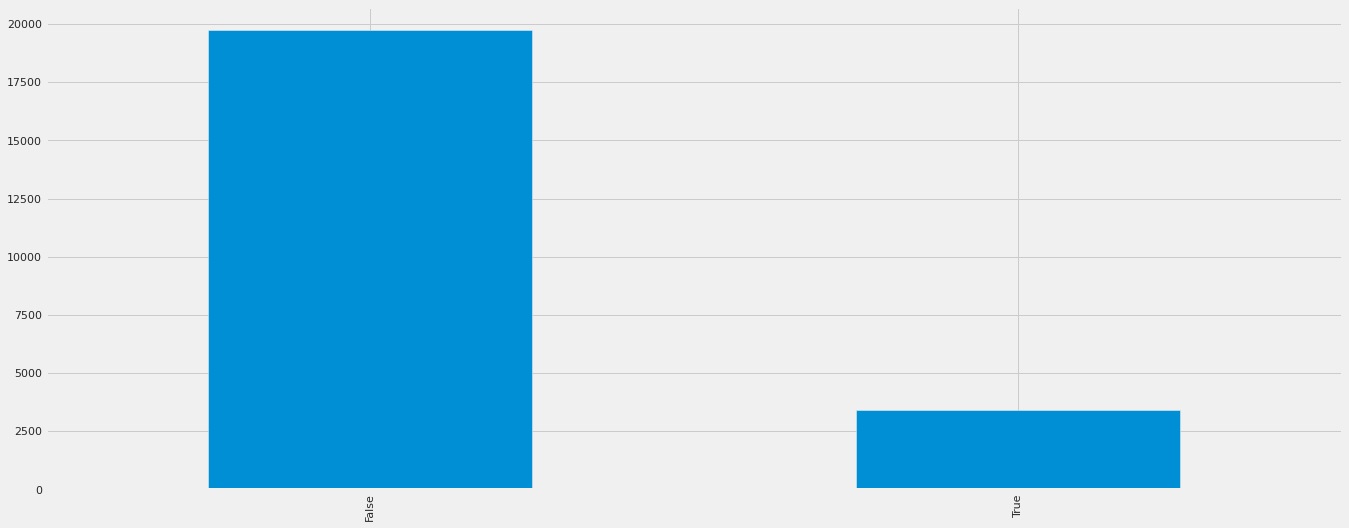

taman


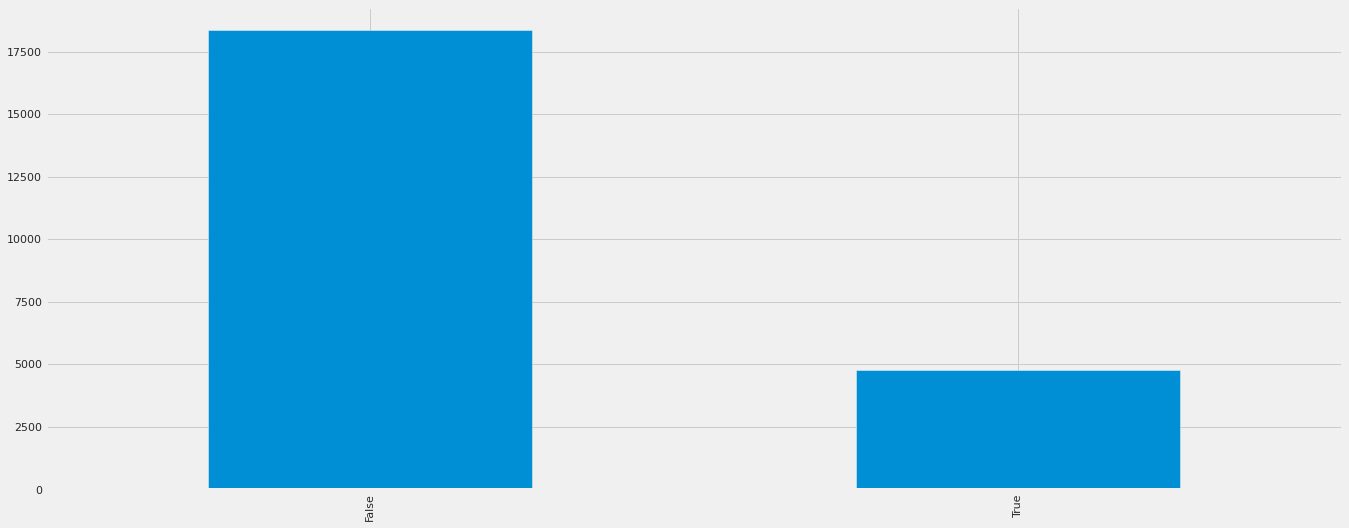

gym


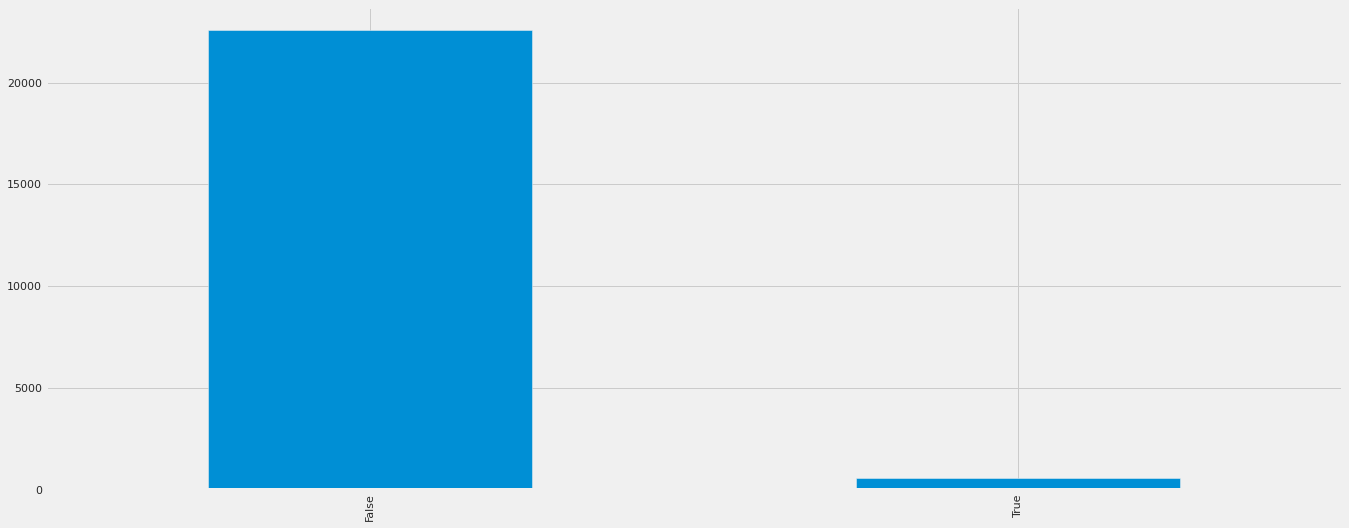

In [20]:
for i in cat:
    if df[i].nunique()<100:
        print(i)
        df[i].value_counts().plot.bar()
        plt.show()

In [21]:
df[num].describe()

,kamar_mandi,kamar,lb,lt,price,electricity,floors_total
count,23154.000000,23154.000000,22478.000000,18886.000000,2.315400e+04,2.267100e+04,23154.000000
mean,3.731105,4.671806,303.466011,371.409669,9.132349e+09,7.255177e+03,2.096312
std,2.220006,2.748071,780.156173,2659.277160,2.941404e+10,2.923871e+05,1.999408
min,1.000000,1.000000,0.000000,1.000000,3.000000e+06,-1.000000e+00,-1.000000
25%,3.000000,3.000000,100.000000,90.000000,1.580250e+09,1.300000e+03,2.000000
50%,3.000000,4.000000,180.000000,150.000000,3.000000e+09,2.200000e+03,2.000000
75%,4.000000,5.000000,320.000000,287.000000,6.950000e+09,4.400000e+03,2.000000
max,29.000000,54.000000,38668.000000,182860.000000,1.830000e+12,4.400350e+07,59.000000


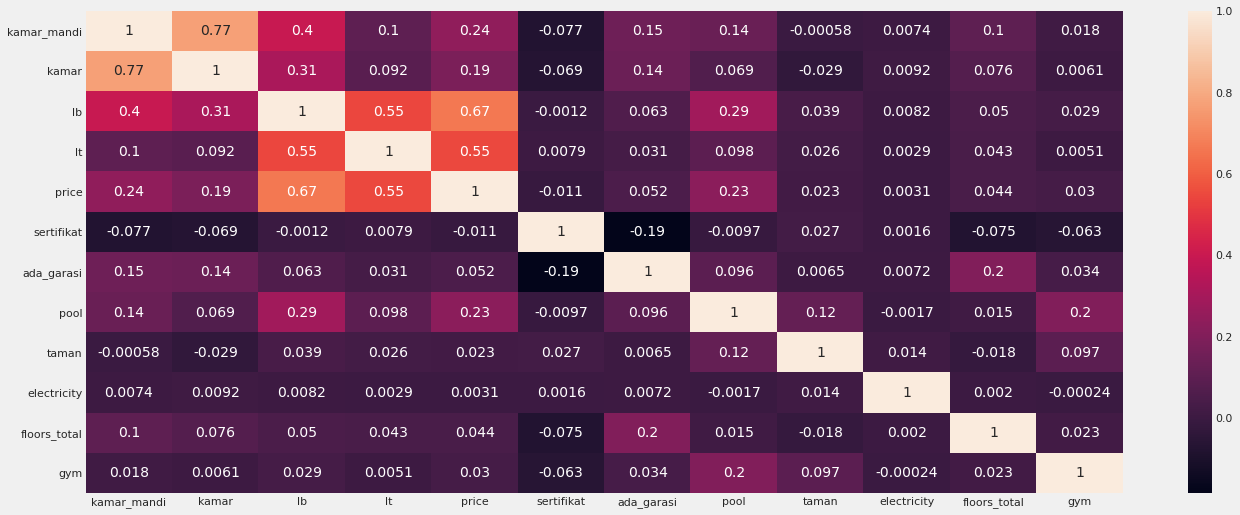

In [95]:
sns.heatmap(df[df['tipe_property']=='Rumah'].drop('index',axis=1).corr(), annot = True)

Check median price distribution

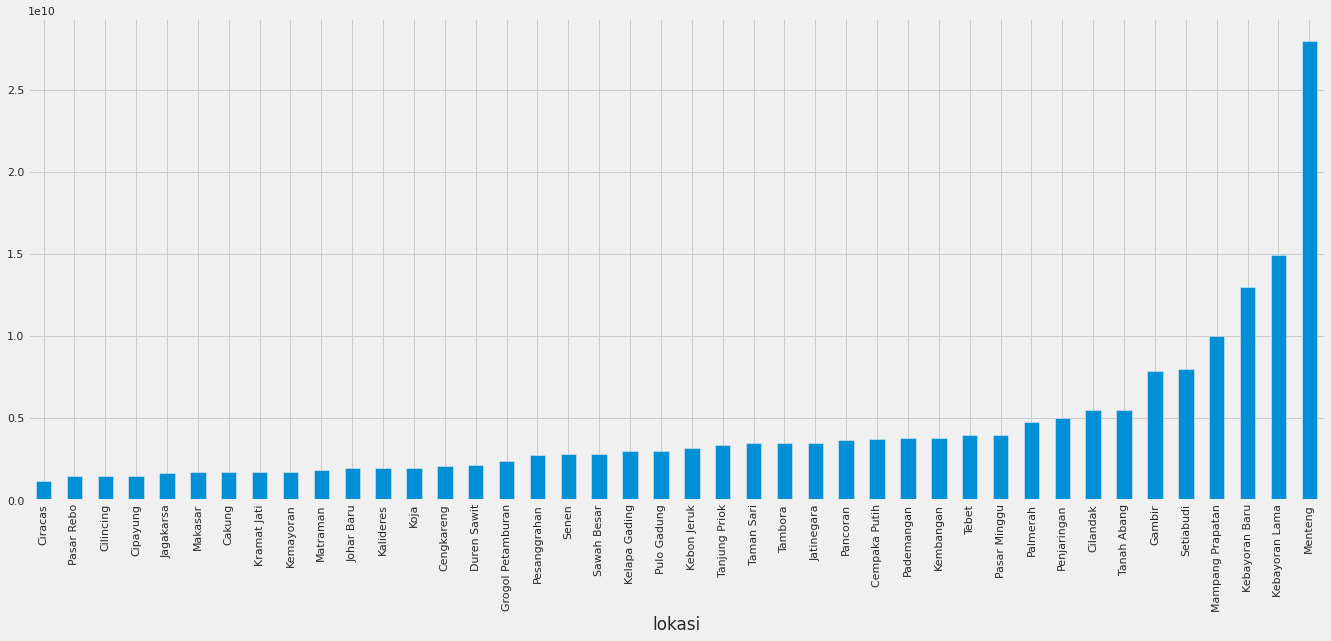

In [48]:
df.groupby('lokasi')['price'].median().sort_values().plot.bar()
plt.show()

check mean price distribution

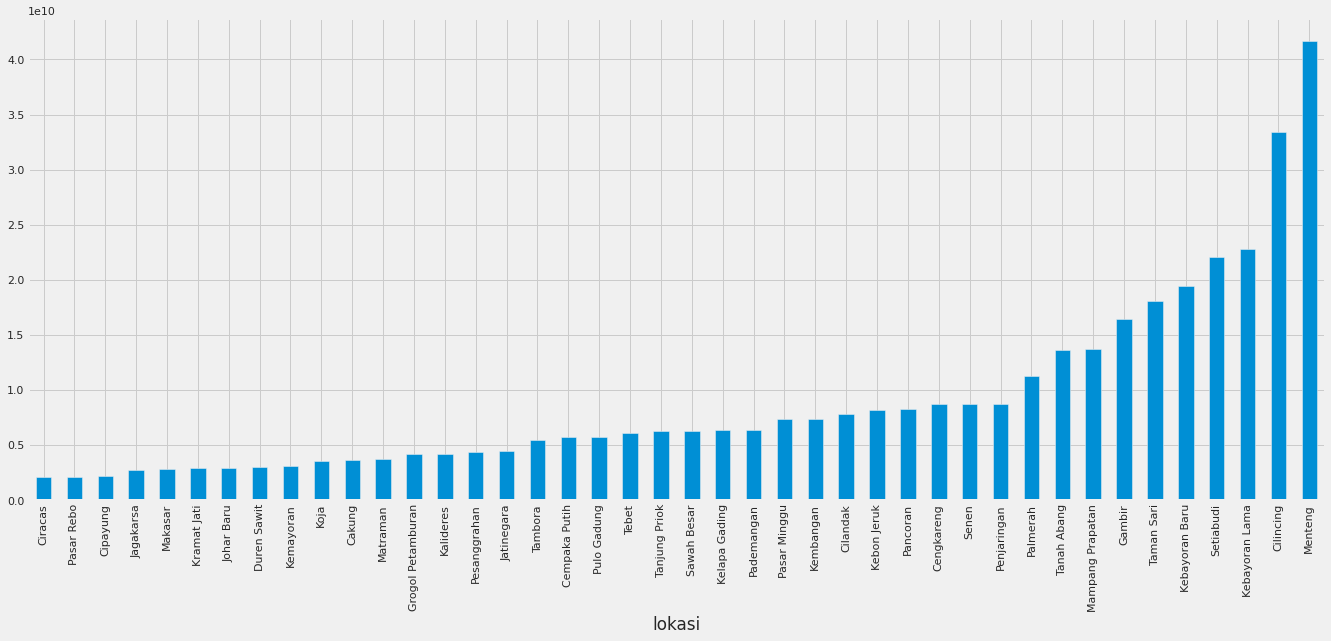

In [87]:
df.groupby('lokasi')['price'].mean().sort_values().plot.bar()
plt.show()

Statistical Check

In [89]:
from scipy import stats
lokasi = [i for i in df['lokasi'].unique()]
pair = {}
for i in lokasi:
    for j in lokasi:
        if j!=i:
            ttest = stats.ttest_ind(a = df[df['lokasi'] == i]['price'],
                                    b = df[df['lokasi'] == j]['price'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
    lokasi.remove(i)

In [84]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

210 651


Dari 651 kombinasi kecamatan, terdapat 210 pasangan kecamatan yang tidak memiliki perbedaan harga yang signifikan
(benerin kata2nya)

In [86]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)

Kebayoran Lama - Setiabudi
Kebayoran Lama - Taman Sari
Pancoran - Pasar Minggu
Pancoran - Cilandak
Pancoran - Tebet
Pancoran - Tanah Abang
Pancoran - Penjaringan
Pancoran - Tanjung Priok
Pancoran - Kelapa Gading
Pancoran - Pademangan
Pancoran - Koja
Pancoran - Jatinegara
Pancoran - Senen
Pancoran - Sawah Besar
Pancoran - Taman Sari
Pancoran - Cengkareng
Pancoran - Kembangan
Pancoran - Palmerah
Pancoran - Kebon Jeruk
Pancoran - Tambora
Cilandak - Pasar Minggu
Cilandak - Senen
Cilandak - Sawah Besar
Cilandak - Cengkareng
Cilandak - Kembangan
Cilandak - Kebon Jeruk
Pesanggrahan - Kelapa Gading
Pesanggrahan - Koja
Pesanggrahan - Cakung
Pesanggrahan - Matraman
Pesanggrahan - Jatinegara
Pesanggrahan - Sawah Besar
Pesanggrahan - Taman Sari
Pesanggrahan - Kalideres
Pesanggrahan - Grogol Petamburan
Pesanggrahan - Tambora
Jagakarsa - Koja
Jagakarsa - Cakung
Jagakarsa - Duren Sawit
Jagakarsa - Kramat Jati
Jagakarsa - Matraman
Jagakarsa - Makasar
Jagakarsa - Kemayoran
Jagakarsa - Johar Baru
Jagaka